In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

performance_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

In [5]:
performance_df.info()
performance_df.head()
performance_df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [10]:
math_boxcox,_ = boxcox(performance_df[performance_df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(performance_df["reading score"])
writing_boxcox,_ = boxcox(performance_df["writing score"])

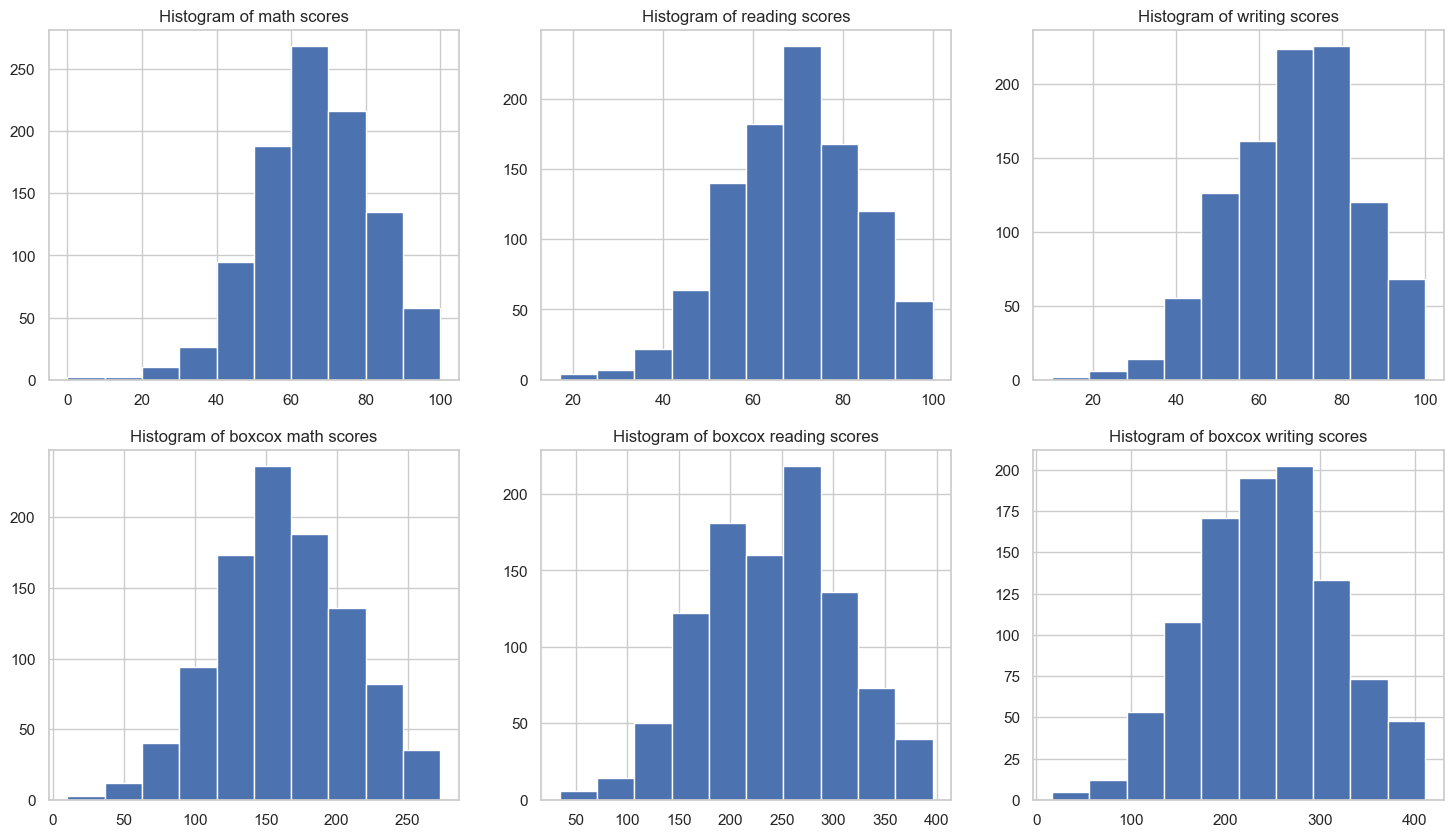

In [14]:
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
plt.hist(performance_df["math score"])
plt.title("Histogram of math scores")

plt.subplot(2,3,2)
plt.hist(performance_df["reading score"])
plt.title("Histogram of reading scores")

plt.subplot(2,3,3)
plt.hist(performance_df["writing score"])
plt.title("Histogram of writing scores")

plt.subplot(2,3,4)
plt.hist(math_boxcox)
plt.title("Histogram of boxcox math scores")

plt.subplot(2,3,5)
plt.hist(reading_boxcox)
plt.title("Histogram of boxcox reading scores")

plt.subplot(2,3,6)
plt.hist(writing_boxcox)
plt.title("Histogram of boxcox writing scores")

plt.show()

In [15]:
jb_stats = jarque_bera(performance_df["math score"])
norm_stats = normaltest(performance_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(performance_df["reading score"])
norm_stats = normaltest(performance_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(performance_df["writing score"])
norm_stats = normaltest(performance_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712718 and p value is 0.00035050753868178273
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987937 and p value is 0.00337402026722133
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.985094482572304 and p value is 0.0009187033894586772
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


In [16]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.7200982636836206 and p value is 0.4231412920959954
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test statistics is 4.119778573559649 and p value is 0.12746808151540903
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042767 and p value is 0.09317842784043168
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


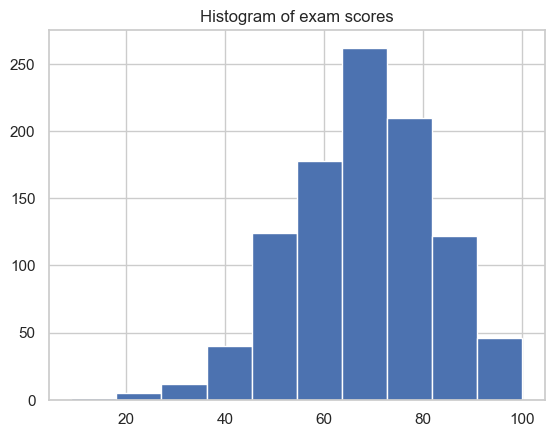

In [17]:
exams = (performance_df["math score"] + performance_df["reading score"] + performance_df["writing score"])/3
plt.hist(exams)
plt.title("Histogram of exam scores")
plt.show()

In [18]:
jb_stats = jarque_bera(exams)
norm_stats = normaltest(exams)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics is 15.453387913085388 and p value is 0.00044089934264402483
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


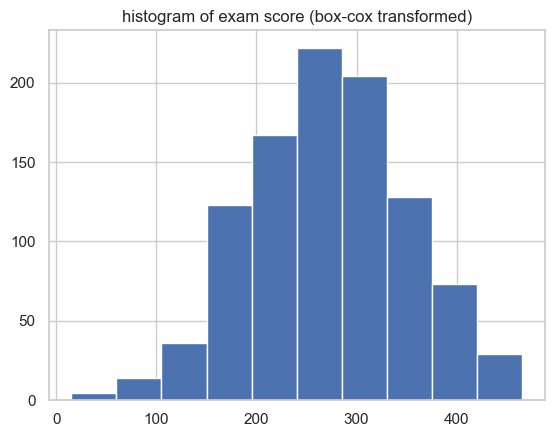

Jarque-Bera test statistics is 2.4353989331279235 and p value is 0.29591013563984125
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


In [20]:
exams_boxcox,_ = boxcox(exams)

plt.hist(exams_boxcox)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

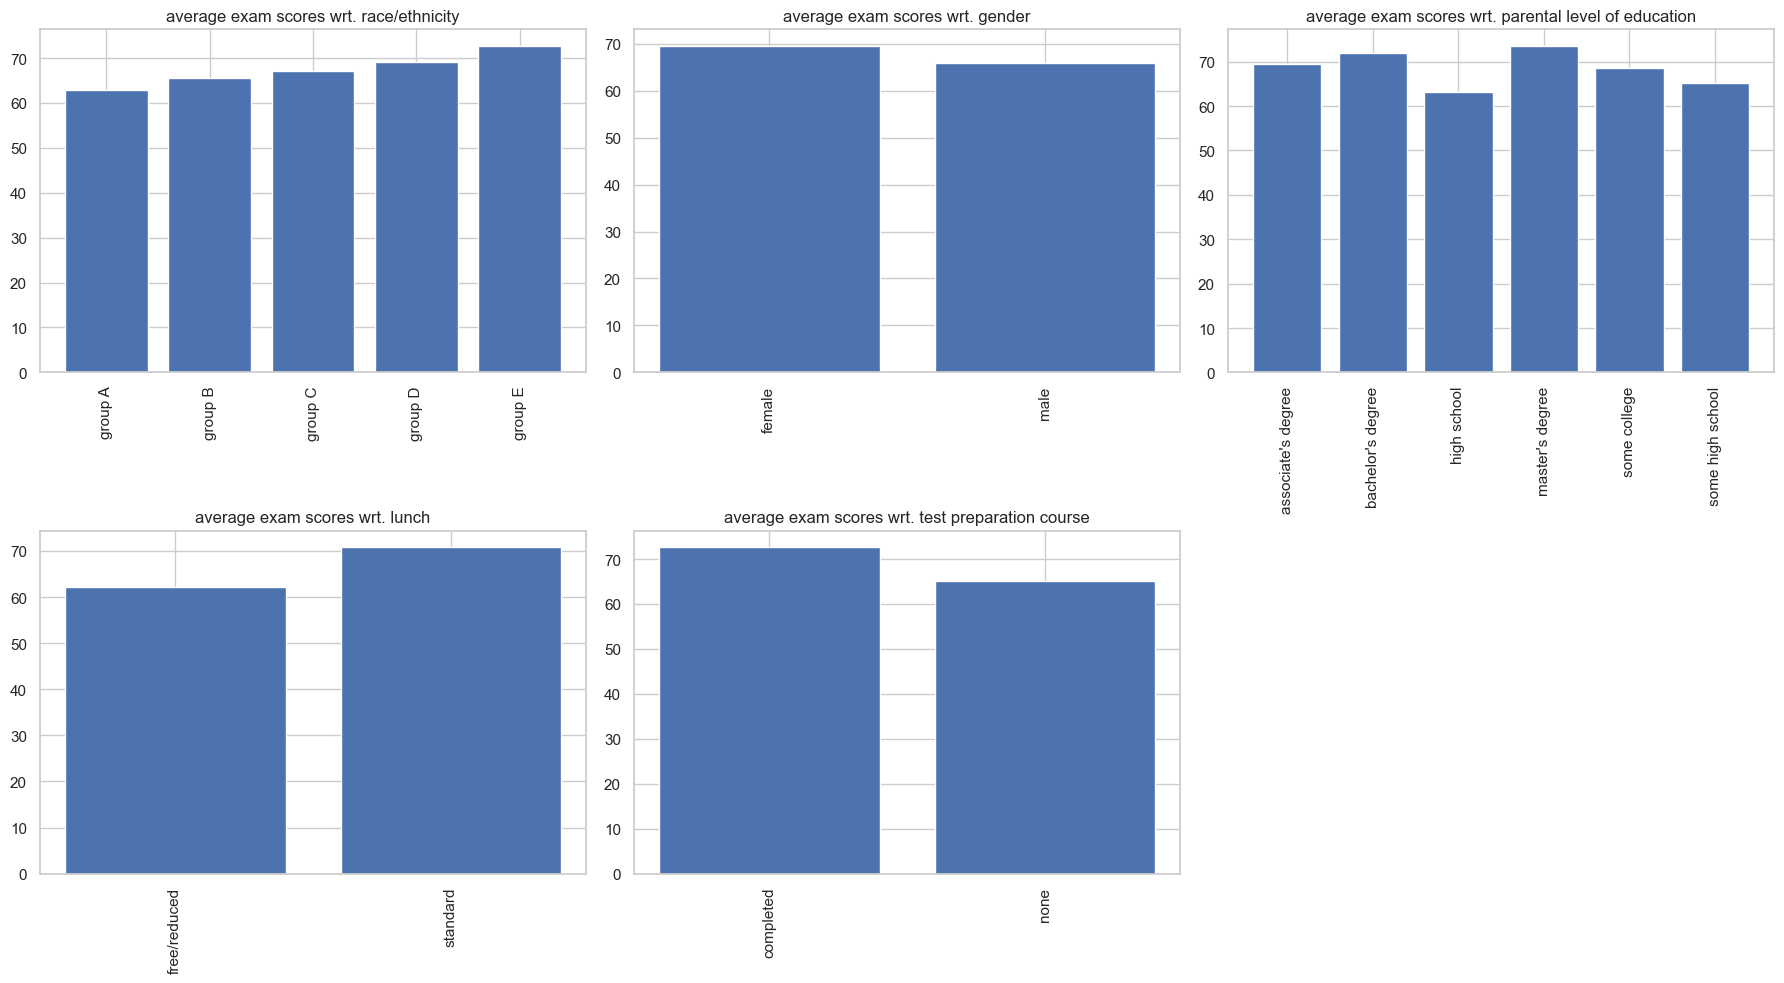

In [22]:
performance_df["exam_score"] = exams

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(performance_df.groupby("race/ethnicity")
        ["exam_score"].mean().index, performance_df.groupby("race/ethnicity")["exam_score"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(performance_df.groupby("gender")
        ["exam_score"].mean().index, performance_df.groupby("gender")["exam_score"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(performance_df.groupby("parental level of education")
        ["exam_score"].mean().index, performance_df.groupby("parental level of education")["exam_score"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(performance_df.groupby("lunch")
        ["exam_score"].mean().index, performance_df.groupby("lunch")["exam_score"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(performance_df.groupby("test preparation course")
        ["exam_score"].mean().index, performance_df.groupby("test preparation course")["exam_score"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()